#We have raw data first and foremost thing is to clean the raw data.then Prepare  and then apply the ML algorithm.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
train_data=pd.read_excel(r'D:\project\Data_Train.xlsx')
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [293]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Problem Statement:Find the missing value

In [294]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [295]:
train_data.shape

(10683, 11)

WE have to delete all the missing value

In [296]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [297]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [298]:
train_data.dropna(inplace=True)

In [299]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Data preprosseing and Extract derived feature

In [300]:
data = train_data.copy()

In [301]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


Covert string data to number  or vector as ml model only understand number

In [302]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [303]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])


In [304]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [305]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
     change_into_datetime(feature)

In [306]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [307]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [308]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [309]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [310]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [311]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [312]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-22 05:50:00,2022-07-22 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5


Perform data Cleaning and feature engineering

In [313]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [314]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-22 05:50:00,2022-07-22 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5


In [315]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [316]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,2019,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-22 13:15:00,7h 25m,2 stops,No info,7662,1,2019,5,5,50


In [317]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15


lets Perform data Analysis(When will most of the flight will take off..........)

In [318]:
def flight_dep_time(x):
    if (x> 4) and (x<= 8):
        return 'Early mrng'
    elif (x>8 ) and (x<= 12):
        return 'Morning'
    elif (x>12 ) and (x<= 16):
        return 'Noon'
    elif (x> 16) and (x<=20 ):
        return 'Evening'
    elif (x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'
    

In [319]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early mrng    2880
Evening       2357
Morning       2209
Noon          1731
Night         1040
Late night     465
Name: Dep_Time_hour, dtype: int64

WE have to visualize above result 

<AxesSubplot:>

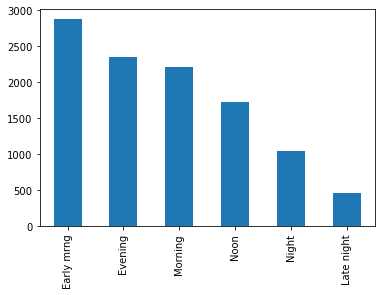

In [320]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

To make it intercative use plotly and cufflink

In [321]:
!pip install plotly

In [322]:
import plotly

In [323]:
!pip install cufflinks

In [324]:
import cufflinks as cf

In [325]:
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [326]:
cf.go_offline()

In [327]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

How to preprocess Duration Feature

In [328]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,2019,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,6,2019,24,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,2019,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,2019,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,2019,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,5,2019,27,11,25,19,15


In [329]:
def preprocess_duration(x):
    if 'h' not in x:
        x ='0h '+ x
    elif 'm' not in x:
        x=x+ ' 0m'
    return x
        

In [330]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [331]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

We define the duration by  two way 
1)Hour Min(good to use first one)
2)Total Min(it create outlier)

In [332]:
data['Duration'][0].split(' ')

['2h', '50m']

In [333]:
data['Duration'][0].split(' ')[0] ##ths is string in nature first we have to convert it into number
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [334]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [335]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))  # lambada is an anonimous function

In [336]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [337]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,9,25,4,25,19,0


Analyse Whether Duration impact price or not??????
which city has maximum final destination of flight???

In [338]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [339]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,7,25,445


#since both are numerical we have use scatter plot or lmplot(regressionplot + scatterplot)

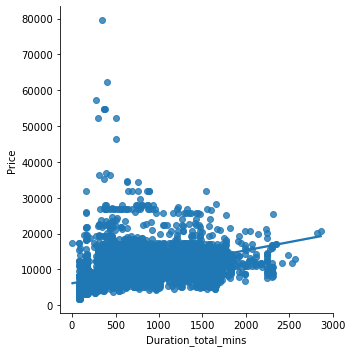

In [340]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

#from figure as we saw that as the duration increse increase fair also increase

#use basic bar/pie/donut or tree chart to find which city has max final destination

In [341]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [342]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

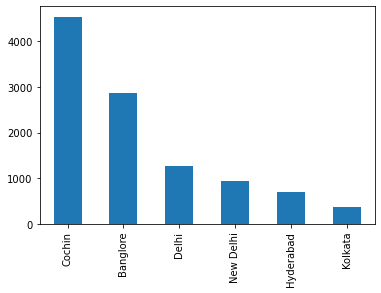

In [343]:
data['Destination'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Destination'>

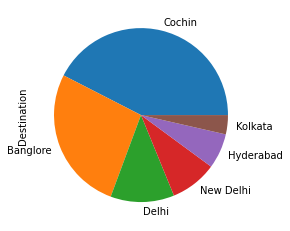

In [344]:
data['Destination'].value_counts().plot(kind='pie')

#Lets perform Bi-variate analysis

In which route Jet Airways is extremely Used ???????

In [345]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

1)Filter Jet Airways
2)Group of Route

In [346]:
data[data['Airline'] == 'Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,2019,3,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,2019,3,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,2019,3,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,9,2019,5,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,9,2019,5,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,6,2019,27,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,5,2019,27,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,12,2019,3,20,35,21,20,24,45,1485


In [347]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Airline vs Price Analysis
(JA price distribution)
(indigo price distribution)
etc....................
Use Distribution PLot/Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

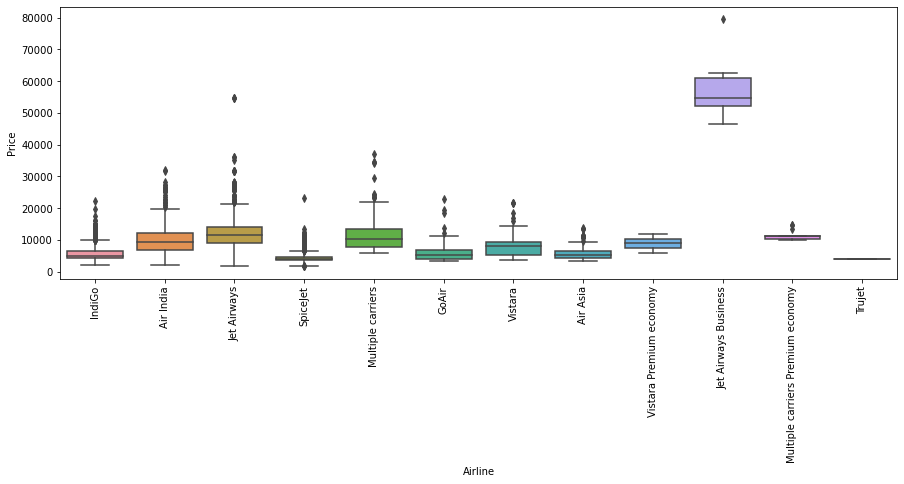

In [348]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

#violin plot=box + distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

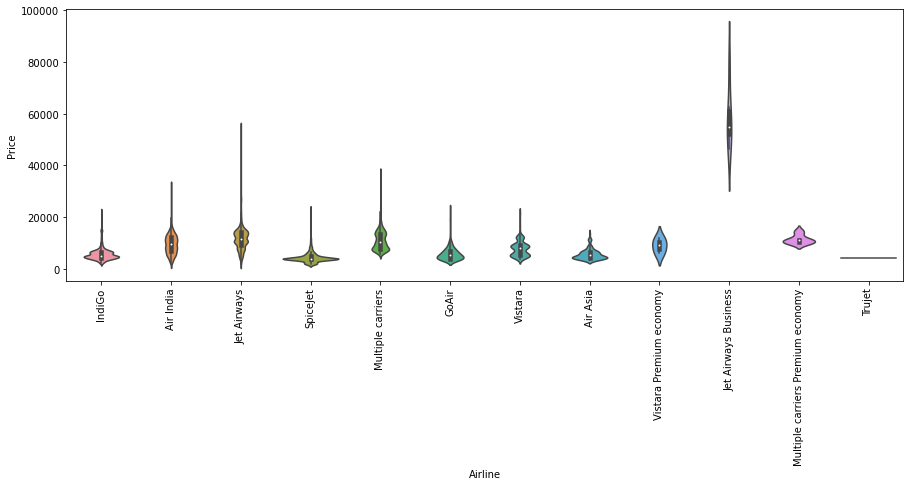

In [349]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

handle Categorical data and apply one hot encoding on data

In [350]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_year,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,2019,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,2019,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,2019,6,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,2019,5,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,2019,3,16,50,21,35,4,45,285


In [351]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

Hence most of the time no such info is given we drop them

In [352]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [353]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_month', 'journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [354]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25


object=categorical
!object = numerical

In [355]:
cat_col =[col for col in data.columns if data[col].dtype=='object']  #categorical

In [356]:
num_col=[col for col in data.columns if data[col].dtype!='object']  #numerical

In [357]:
cat_col


['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [358]:
type(data['Total_Stops'][0])

str

In [359]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [360]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

Thumb Rule 
If data is belong to ordinal category  we can think of use of label encoder 
ordinal data=order(label encoding)
Nominal data=doesnot have any order(one hot encoding)
we have encode by completely builtin function but here we have do from complete scratch.

In [361]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [362]:
for category in data['Source'].unique():
    data['Source_'+ category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [363]:
 data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


Lets think about the case when 1000 cities then the one hot encoding cause the curse of dimensionality
#apply target guided encoding on data(priortize based on certain fact)
make disctionary of city as key and rank as the value 
first we have to find the average price
then perform manual encoding on data

In [364]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [365]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

WE need to convert this to dictionary

In [366]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [367]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [368]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,Jet Airways,Banglore,Delhi,3h 0m,non-stop,7229,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


In [369]:
data['Airline']=data['Airline'].map(dict1)

In [370]:
data

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,22,25,2,30,0,1,0,0,0
10679,7,Kolkata,Banglore,2h 35m,non-stop,4145,4,27,20,45,23,20,2,35,0,1,0,0,0
10680,10,Banglore,Delhi,3h 0m,non-stop,7229,4,27,8,20,11,20,3,0,1,0,0,0,0
10681,5,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,14,10,2,40,1,0,0,0,0


In [371]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [372]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [373]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [374]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [375]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [376]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [377]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [378]:
dict2={key:index for index,key in enumerate(dest,0)}

In [379]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [380]:
data['Destination']=data['Destination'].map(dict2)

In [381]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [382]:
data.dtypes


Airline                 int64
Source                 object
Destination             int64
Duration               object
Total_Stops            object
Price                   int64
journey_month           int64
journey_day             int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [383]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [384]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai


In [385]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


In [386]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [387]:
stops={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4,}

In [388]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [389]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


Lets perform outlier detection
How to deal with outlier

In [390]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



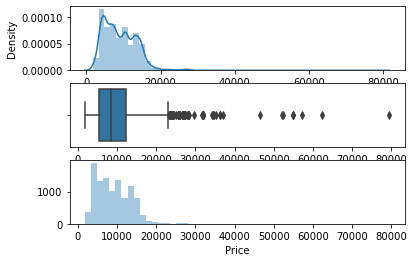

In [391]:
plot(data,'Price')

#How to deal with outlier

In [392]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



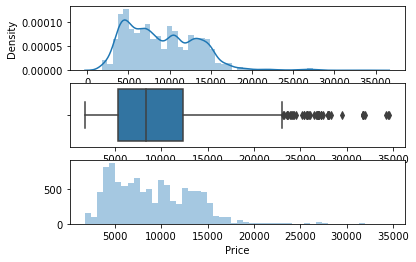

In [393]:
plot(data,'Price')

#Select best feature using best featuring technique
lets perform feature selection

In [394]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [395]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [396]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [397]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_month            int64
journey_day              int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

feature selection is the best feature selection for the target feature
1)selectkbest
fregresiion
mutual info regression]-pvalue

In [398]:
from sklearn.feature_selection import mutual_info_regression

Here price is dependent feature and rest all are independent feture
Lets store this independent feature in X
dependent feature in y

In [399]:
X=data.drop(['Price'],axis=1)

In [400]:
y=data['Price']

In [401]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_month          int64
journey_day            int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [402]:
mutual_info_regression(X,y)

array([0.97645858, 1.00056358, 0.80056665, 0.23929393, 0.19750339,
       0.33887085, 0.25936586, 0.39817663, 0.35240974, 0.47074892,
       0.34377001, 0.38328601, 0.45159912, 0.52043425, 0.13755417,
       0.19853369])

In [403]:
imp =pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']
imp

,importance
Airline,0.979161
Destination,1.003783
Total_Stops,0.776444
journey_month,0.235136
journey_day,0.194721
Dep_Time_hour,0.343289
Dep_Time_minute,0.260840
Arrival_Time_hour,0.406660
Arrival_Time_minute,0.346135
Duration_hours,0.464270


In [404]:
imp.sort_values(by='importance',ascending = False)

,importance
Destination,1.003783
Airline,0.979161
Total_Stops,0.776444
Source_Delhi,0.518672
Source_Kolkata,0.470479
Duration_hours,0.464270
Arrival_Time_hour,0.406660
Source_Banglore,0.392275
Duration_mins,0.347320
Arrival_Time_minute,0.346135


#Apply Random Forest Algorithm on Data
Lets Build ML model
Lets save model

#Hyperparameter optimization
we need data
 we need Data of two types training data and testing data
 lets create a training data and test data
 75%-training data
 25%-Testing



In [405]:
from sklearn.model_selection import train_test_split

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [407]:
from sklearn.ensemble import RandomForestRegressor

In [408]:
ml_model=RandomForestRegressor()

In [409]:
model=ml_model.fit(X_train,y_train)

In [410]:
y_pred=model.predict(X_test)

In [411]:
y_pred
y_pred.shape

(2671,)

In [412]:
len(X_test)

2671

#Lets save the model


In [413]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [414]:
import pickle

In [415]:
file=open(r'D:\project\rf_random.pkl','wb')

In [416]:
pickle.dump(model,file)

In [417]:
model=open(r'D:\project\rf_random.pkl','rb')

In [418]:
forest=pickle.load(model)

In [419]:
forest.predict(X_test)

array([16736.12,  6375.87,  8746.25, ...,  3517.43,  6408.76,  6956.18])

In [420]:
y_pred

array([16736.12,  6375.87,  8746.25, ...,  3517.43,  6408.76,  6956.18])

How to define your evalution metric.
how to automate ml pipeline

In [421]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [422]:
mape(y_test,forest.predict(X_test))

13.272746723353388

#Automate ML pipeline

In [423]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training_score: {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score:{}'.format(r2_score))
    print('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ',metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ',mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)
    

Training_score: 0.9524197014856397
Predictions are : [16724.08  6211.17  8792.28 ...  3458.68  6425.15  7034.92]


r2_score:0.8053462024850143
MSE :  3789442.203377441
MAE :  1184.2747194985639
RMSE :  1946.6489676820115
MAPE :  13.255206670646727


C:\Users\ajitk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



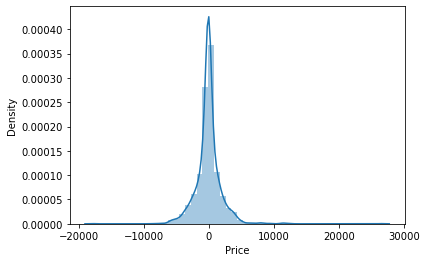

In [424]:
predict(RandomForestRegressor())

#How to hypertune your ML model

In [425]:
y_pred

array([16736.12,  6375.87,  8746.25, ...,  3517.43,  6408.76,  6956.18])

In [426]:
y_test

6075    16655.0
3544     4959.0
9291     9187.0
5032     3858.0
2483    12898.0
         ...   
3022    13555.0
8416    12760.0
2605     3419.0
1392     5797.0
8535     6818.0
Name: Price, Length: 2671, dtype: float64